### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

In [27]:
import matplotlib.pyplot as plt

# Your code here

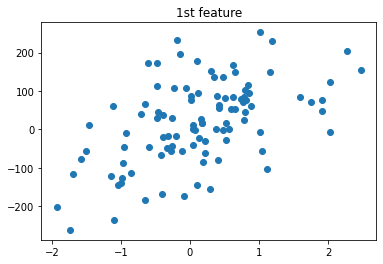

In [28]:
plt.scatter(X[:,0],y)
plt.title("1st feature")

plt.show()

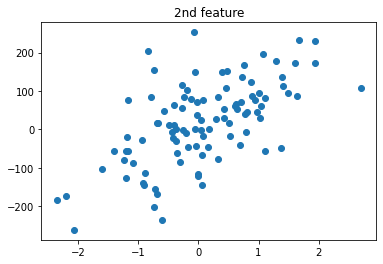

In [29]:
plt.scatter(X[:,1],y)
plt.title("2nd feature")

plt.show()

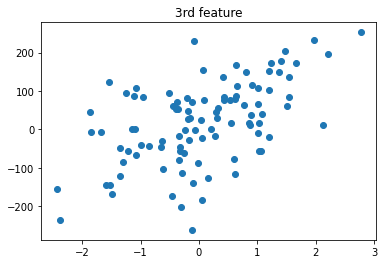

In [30]:
plt.scatter(X[:,2],y)
plt.title("3rd feature")

plt.show()

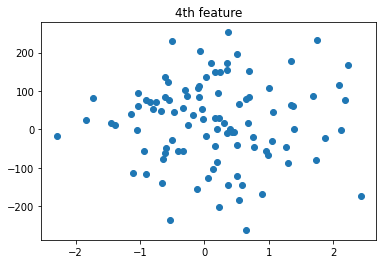

In [31]:
plt.scatter(X[:,3],y)
plt.title("4th feature")

plt.show()

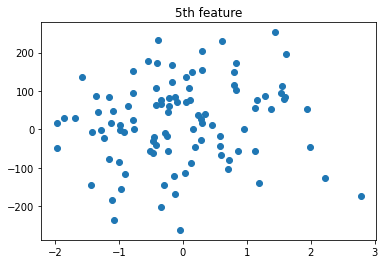

In [32]:
plt.scatter(X[:,4],y)
plt.title("5th feature")

plt.show()

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [35]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
      self.w = np.array([50.0,50.0,50.0,50.0,50.0])
      self.b= np.array([5.0,5.0,5.0,5.0,5.0])

        # Your code here

       # pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
      for x in range(0,1000):
        ew = [0.0,0.0,0.0,0.0,0.0]
        eb = 0.0
        for i in range(80):
          yp=0
          for k in range(5):
            yp =yp + X[i,k]*self.w[k]
          yp = yp + self.b
          for k in range(5):
            temp =0
            temp =+ (X[i,k]*y[i]-X[i,k]*yp)
          ew =+ (-1)*temp
          eb =+(-1)*(y[i]-yp)
          ew = 2/80*ew
          eb = 2/80*eb
        self.w = self.w-(0.001)*ew
        self.b = self.b-(0.001)*eb

        ew = [0.0,0.0,0.0,0.0,0.0]
        eb = 0.0




      

        # Gradient Descent code goes here

        pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
      result=[]
      n = len(X)
      for i in range(n):
        yp=0.0
        for k in range(5):
          yp =+ X[i,k]*self.w[k]
        yp =+self.b
        result.append(yp)
        return result

        # Code goes here
        
        #pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [36]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead
regressor.fit(X_train,y_train)
# Call the fit method on the object to train (pass appropriate part of dataset)


# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [45]:
def mean_squared_error(y_true, y_pred):
  mse=0
  for i in range (len(y_pred)):
    mse+=(1/len(y_pred))*((y_true[i]-y_pred[i])**2)
  return mse
  
 # return mse/len(y_pred)
       # return the mean squared error
      # pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
  ymean=np.average(y_true)
  mse=0
  me=0
  for i in range(len(y_pred)):
    mse+=((y_true[i]-y_pred[i])**2)
    me+=((y_true[i]-ymean)**2)
  r2=1-(mse/me) 

  return r2
      # return the r2 score
      #pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test,predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: [51223.6165041 51223.6165041 51223.6165041 51223.6165041 51223.6165041]
Accuracy: [-0.36367317 -0.36367317 -0.36367317 -0.36367317 -0.36367317]
